# Prelab 5: How to use Scikit Learn for Classification and Clustering

### Classification:  SVM 

Support Vector Machines (SVM) are among the most useful and powerful supervised learning algorithm. Here we are going to look at an example of using SVM models in scikit-learn. Then, it will be your turn to try this model.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

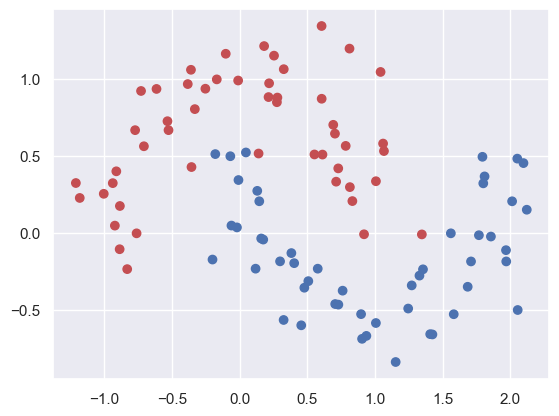

In [2]:
from sklearn.model_selection import train_test_split
# Import make_moons from scikit learn to generate synthetic data
from sklearn.datasets import make_moons


# 2d classification dataset
Xs , ys = make_moons( n_samples = 100,noise = 0.2 , random_state = 0)


# train-test split
Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, ys , test_size = 0.15)

#plot the data
colors = np.array(['r' , 'b'])
plt.scatter(Xs[:,0] , Xs[:,1]  ,c = colors[ys] )
plt.show()


We will perform both linear and nonlinear SVM on this synthetic dataset:

In [4]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.80      0.89        10

    accuracy                           0.87        15
   macro avg       0.86      0.90      0.86        15
weighted avg       0.90      0.87      0.87        15

[[5 0]
 [2 8]]


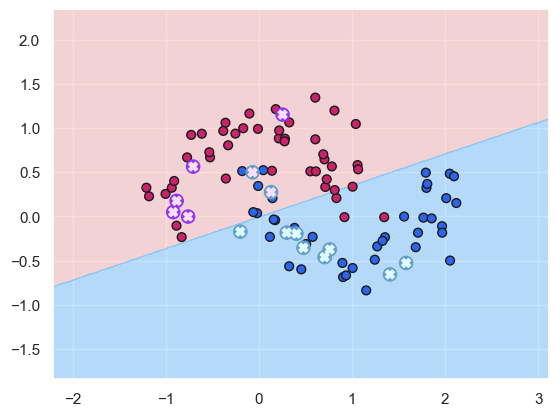

In [5]:
#Import SVM
from sklearn import svm

from matplotlib.colors import ListedColormap
from sklearn import metrics


cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# Fit data
clf1.fit(Xs_train, ys_train)

# Predict
ys_predict = clf1.predict(Xs_test)


#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(metrics.confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,alpha = 0.5)

# For plotting train and test and prediction separately 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0, c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

Now we apply a non-linear svm classifier

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.90      0.95        10

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.94      0.93      0.93        15

[[5 0]
 [1 9]]


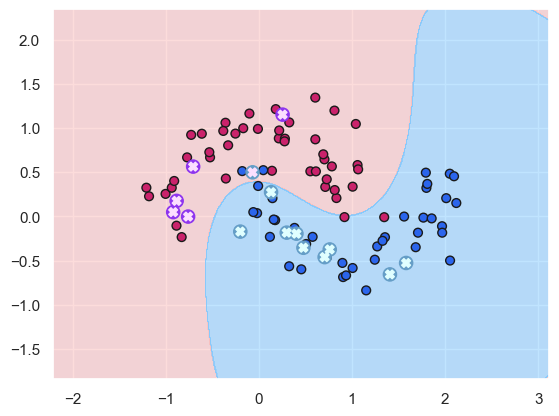

In [6]:
# clf2 is a nonlinear svm classifier

clf2 = svm.SVC(kernel = 'rbf')


# Fit data
clf2.fit(Xs_train, ys_train)

# Predict
ys_predict2 = clf2.predict(Xs_test)



#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict2))
print(metrics.confusion_matrix(ys_test, ys_predict2))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,alpha = 0.5)

# For plotting train and test and prediction separately 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict2, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    